### Deliverable 2 - Scrape and Analyize Mars Weather Data 

#### Create a Jupyter notebook named mars_data_challenge_part_2. (done) 

#### Import the relative dependncies for web scraping, Pandas, and MatPlotLib 

In [124]:
#import pandas and matplotlib dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt 

In [125]:
#import Splinter and Beautiful Soup 
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [126]:
#set the executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [127]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

#define html variable 
html = browser.html
html_soup = soup(html, 'html.parser')

In [128]:
#find table headers
t_headers = html_soup.find_all('th')
# t_headers

In [129]:
#extract headers
header_list = []

for row in t_headers: 
    header = row.text.strip()
    header_list.append(header)
    
# header_list

In [130]:
#find table records
t_records = html_soup.find_all('tr', class_='data-row')

# t_records

In [131]:
#count number of headers 
header_count = range(len(header_list))
# print(header_count)

In [22]:
#extract data from each row

#declare transitional table
result_dict = {}

#declare lists
record_values = []
result_list = [] 

#iterate through scraped results 
for record in t_records: #loop through rows 
    record_values = record.find_all('td')
    for i in header_count: #loop through columns and match to headers 
        result_dict[header_list[i]]=record_values[i].text.strip()
    result_list.append(result_dict.copy())

In [132]:
#print results (Creates a list of dictionaries)
result_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [24]:
#cast to DataFrame 

#declare dataFrame 
results_df = pd.DataFrame(result_list)

results_df 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


##### Examine the data types of all the DataFrame columns.  If necessary cast(or convert) the data to the appropriate datetime, int or float datatypes. 

In [133]:
#check column types 
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [134]:
#convert data types 
#code suggestion - https://stackoverflow.com/questions/15891038/change-column-type-in-pandas#:~:text=The%20best%20way%20to%20convert,floating%2Dpoint%20numbers%20as%20appropriate.
converted_df = results_df.astype({"id": int, "terrestrial_date": object, "sol": int, "ls": int, "month": int, "min_temp": float, "pressure": float})
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int32  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int32  
 3   ls                1867 non-null   int32  
 4   month             1867 non-null   int32  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int32(4), object(1)
memory usage: 73.1+ KB


In [135]:
#convert to date/time 
converted_df["con_date"] = pd.to_datetime(converted_df["terrestrial_date"])
converted_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   object        
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
 7   con_date          1867 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(4), object(1)
memory usage: 87.6+ KB


In [136]:
#drop original ter_date field 
final_df = converted_df.drop('terrestrial_date', axis=1)
final_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1867 non-null   int32         
 1   sol       1867 non-null   int32         
 2   ls        1867 non-null   int32         
 3   month     1867 non-null   int32         
 4   min_temp  1867 non-null   float64       
 5   pressure  1867 non-null   float64       
 6   con_date  1867 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [137]:
#reorder columns 
order_df = final_df.loc[:, ['id', 'con_date', 'sol', 'ls', 'month', 'min_temp',  'pressure']]
order_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1867 non-null   int32         
 1   con_date  1867 non-null   datetime64[ns]
 2   sol       1867 non-null   int32         
 3   ls        1867 non-null   int32         
 4   month     1867 non-null   int32         
 5   min_temp  1867 non-null   float64       
 6   pressure  1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [138]:
#rename columns 
mars_df = order_df.rename(columns={'con_date': 'terrestrial_date'}, errors="raise")
mars_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


##### Answer the following question:  How many months exist on Mars? 

In [151]:
months = mars_df['month'].max()

print (f"{months} months exist on Mars per data in the dataset. \nThere are 24 months on Mars per published reference information. \n(citation: https://interimm.org/mars-clock/en/cal-doc.html#:~:text=In%20general%2C%20there%20are%2024,or%20Spring%20Equinox%20on%20Mars.)")

#note - a google search shows that there are actually 24 months on Mars.  The dataset month column holds integer values 1-12. 

12 months exist on Mars per data in the dataset. 
There are 24 months on Mars per published reference information. 
(citation: https://interimm.org/mars-clock/en/cal-doc.html#:~:text=In%20general%2C%20there%20are%2024,or%20Spring%20Equinox%20on%20Mars.)


Answer the following question:  How many Martian (and not Earth) days worth of data exist in the scraped dataset? 


In [77]:
#assumption - sol is a solar day on Mars.   Determining the number of days will be the difference between the min sol and
#max sol. 

min_day = mars_df['sol'].min()
max_day = mars_df['sol'].max()

count_days = max_day - min_day
count_days

1967

Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

Get the answer by averaging the minimum daily temperature of all the months. 
Plot the results as a bar chart.

In [152]:
#create a dataframe with columns month and min_temp 
temps = mars_df[['month', 'min_temp']]
temps

,month,min_temp
0,6,-75.0
1,6,-76.0
2,6,-76.0
3,6,-74.0
4,6,-74.0
...,...,...
1862,5,-78.0
1863,5,-77.0
1864,5,-76.0
1865,5,-77.0


In [153]:
#group by month and average min_temp 
temp_count = temps.groupby(['month']).mean('min_temp')
#temp_count

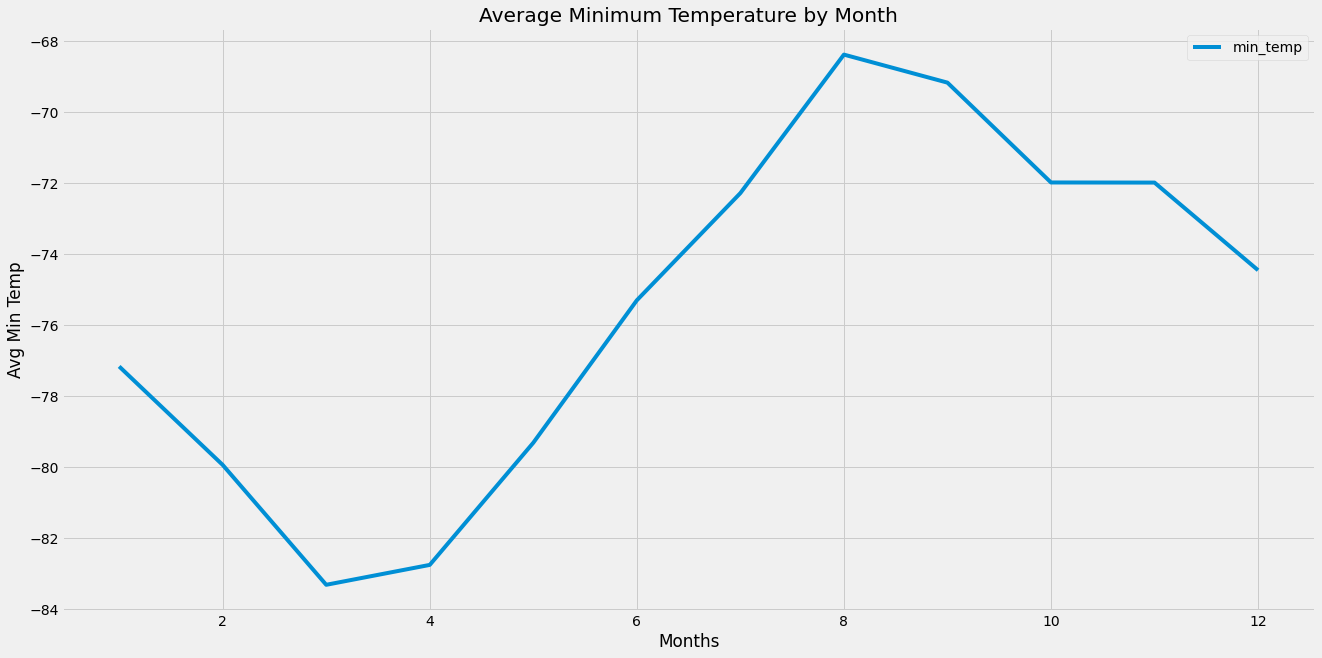

<Figure size 432x288 with 0 Axes>

In [154]:
#generate plot of average minimum temperature by month 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot the resampled DataFrame.
temp_plot = temp_count.plot(figsize = (20,10))
# Add a title 
temp_plot.set_title("Average Minimum Temperature by Month")
#  Add a x- and y-axis label.
temp_plot.set_xlabel("Months")
temp_plot.set_ylabel("Avg Min Temp")

#show and format plot
plt.show()
plt.tight_layout()

###### Answer: The 3rd month is the coldest, and the 8th month is the warmest given the data in the dataset. 

###### Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [155]:
#create a sub dataset with columns month and pressure 
pressure = mars_df[['month', 'pressure']]
#pressure

In [156]:
#group and calculate average of pressures
pressure_count = pressure.groupby(['month']).mean('pressure')
#pressure_count

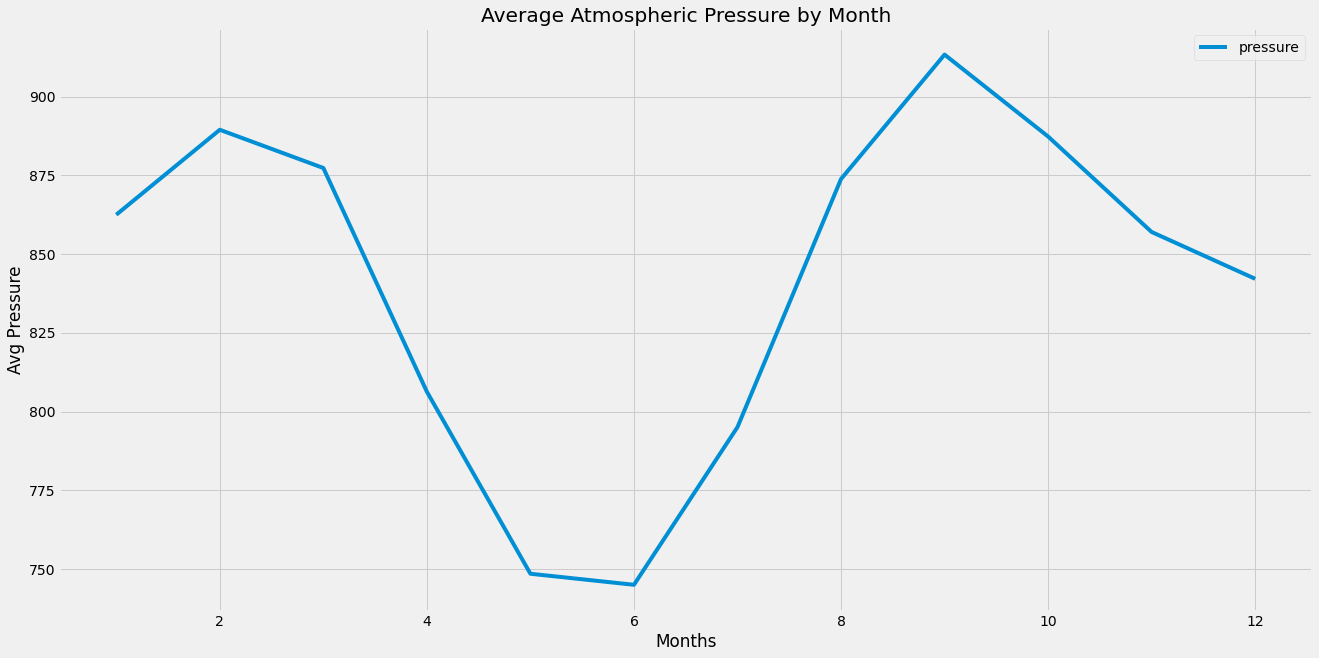

<Figure size 432x288 with 0 Axes>

In [157]:
#generate plot of average pressure by month 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot the resampled DataFrame.
temp_plot = pressure_count.plot(figsize = (20,10))
# Add a title 
temp_plot.set_title("Average Atmospheric Pressure by Month")
#  Add a x- and y-axis label.
temp_plot.set_xlabel("Months")
temp_plot.set_ylabel("Avg Pressure")

#show and format plot
plt.show()
plt.tight_layout()

###### Answer: The 9th month has the highest atmospheric pressure and the 6th month has the lowest given the data in the dataset.

###### Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

In [160]:
#establish a dataframe containing the min_temps. 
day_count = mars_df[['min_temp']]
#day_count

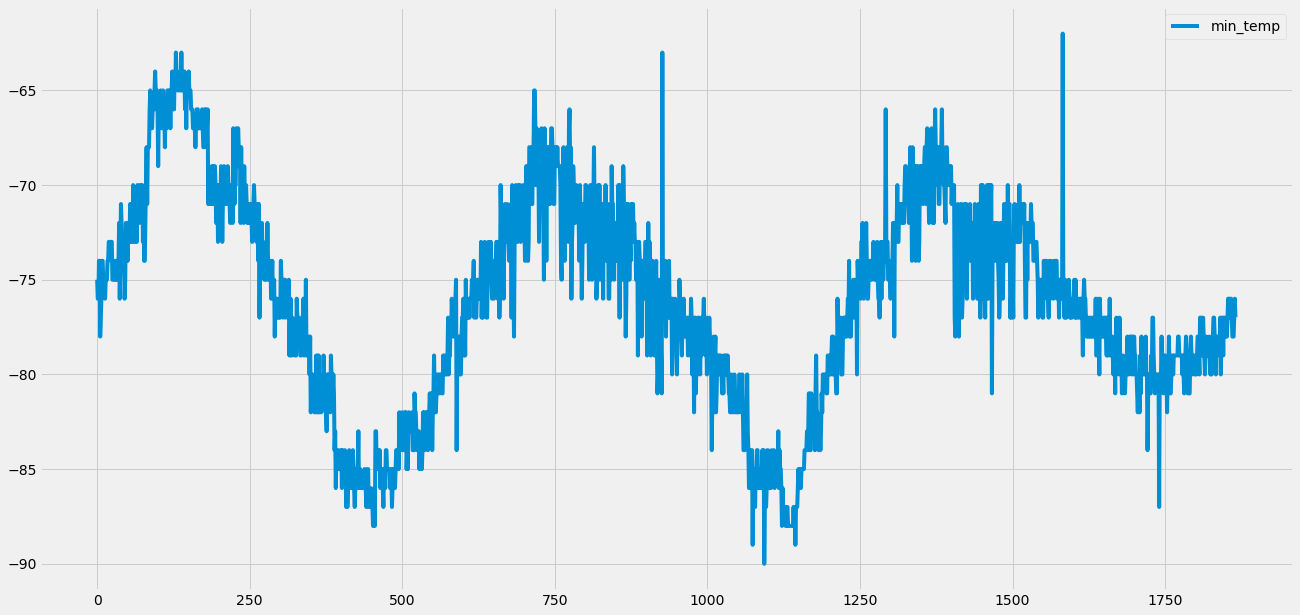

<Figure size 432x288 with 0 Axes>

In [161]:
#generate plot of minimum temperatures by month 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot the resampled DataFrame.
day_plot = day_count.plot(figsize = (20,10))
# Add a title 
temp_plot.set_title("Earth Days to Mars Year")
#  Add a x- and y-axis label.
temp_plot.set_xlabel("terrestrial_date")
temp_plot.set_ylabel("min_temp")

#show and format plot
plt.show()
plt.tight_layout()

##### Answer: The above plot shows the minimum daily temperature for all values in the dataset.  The assumption was made that the lowest points on the chart are approximately one earth year apart (365 days)  The lowest points appear to be at approximately 450 and 1100 days, a difference of 650 days.  While not exact, this calculation does result in a 5.38% deviation from the 687 day result NASA published here: https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/. 

#### Export the DataFrame to a CSV file.

In [120]:
# Create the output file (CSV).
mars_data_export = "export_files/mars_data.csv"
# Export the City_Data into a CSV.
mars_df.to_csv(mars_data_export, index=False)

#### Rubric Check 

##### The HTML table was extracted into a Pandas DataFrame. Either Pandas or Splinter and Beautiful Soup were used to scrape the data. The columns have the correct headings and data types. (15 points) (DONE) 

##### The data was analyzed to answer the following questions, and a data visualization was created to support each answer: (40 points) (Done) 

###### How many months exist on Mars? (No visualization required in the instructions) 
###### Which month, on average, has the lowest temperature? The highest? (Done) 
###### Which month, on average, has the lowest atmospheric pressure? The highest? (Done) 
###### How many terrestrial days exist in a Martian year? A visual estimate within 25% was made. (Done) 
###### The DataFrame was exported into a CSV file. (5 points) (Done)

Rubric Check complated 11/5/22. 